In [90]:
import matplotlib.pyplot as plt
from time import time
import numpy as np

# first, lets time our timer to make sure that it can actually do well


# measures the time to execute this function
def get_latency(func, count, warmup=0):
    for i in range(0, warmup): 
        func()
    start_time = time()
    for i in range(0, count): 
        func()
    
    runtime = time() - start_time
    return (runtime / count) * 10**9 # seconds --> nanoseconds


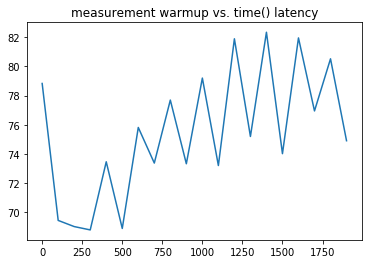

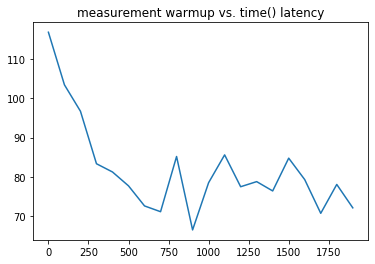

In [91]:
from time import sleep

def do_time():
    time()

def do_pass():
    pass

p = 1.1
for i in range(0, 1000000):
    p *= 1.1

time_times = [get_latency(do_time, 100000, warmup=warmup) - get_latency(do_pass, 100000, warmup=warmup) for warmup in range(0, 2000, 100)]
plt.plot(list(range(0, 2000, 100)), time_times)
plt.title("measurement warmup vs. time() latency")
plt.show()

sleep(1)

time_times = [get_latency(do_time, 100000, warmup=warmup) - get_latency(do_pass, 100000, warmup=warmup) for warmup in range(0, 2000, 100)]
plt.plot(list(range(0, 2000, 100)), time_times)
plt.title("measurement warmup vs. time() latency")
plt.show()

In [92]:
import numpy as np

# do a bit of warmup
p = 1.1
for i in range(0, 1000000):
    p *= 1.1

time_times = [get_latency(do_time, 100000) for i in range(0, 200)]
pass_times = [get_latency(do_pass, 100000) for i in range(0, 200)]


print(f'time in function: {np.mean(time_times)} +/- {np.std(time_times)}')
print(f'pass in function: {np.mean(pass_times)} +/- {np.std(pass_times)}')

print(f'time(): {np.mean(time_times) - np.mean(pass_times)} +/- {(np.std(time_times)**2 + np.std(pass_times)**2)**.5}')



time in function: 141.72598123550415 +/- 8.426242126148896
pass in function: 66.83347225189209 +/- 4.501822773536122
time(): 74.89250898361206 +/- 9.553426853899847


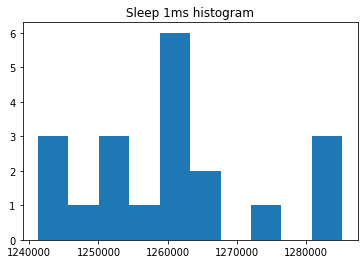

time(): 1.260693200778961 +/- 0.012504050413282342 ms


In [85]:
from time import sleep

def do_sleep_1ms():
    sleep(.001)
    
pass_times = [get_latency(do_pass, 100000) for i in range(0, 200)]
sleep_times = [get_latency(do_sleep_1ms, 100) for i in range(0, 20)]

plt.hist(sleep_times)
plt.title("Sleep 1ms histogram")
plt.show()

print(f'time(): { (np.mean(sleep_times) - np.mean(pass_times)) * 10**-6 } +/- {((np.std(sleep_times)**2 + np.std(pass_times)**2)**.5) * 10 **-6} ms')


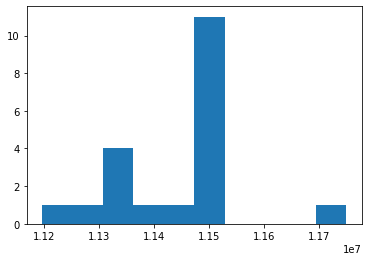

time(): 11.44291398191452 +/- 0.11564061214612124 ms


In [93]:
def do_sleep_10ms():
    sleep(.01)

pass_times = [get_latency(do_pass, 100000) for i in range(0, 200)]
sleep_times = [get_latency(do_sleep_10ms, 100) for i in range(0, 20)]

plt.hist(sleep_times)
plt.show()

print(f'time(): { (np.mean(sleep_times) - np.mean(pass_times)) * 10**-6 } +/- {((np.std(sleep_times)**2 + np.std(pass_times)**2)**.5) * 10 **-6} ms')


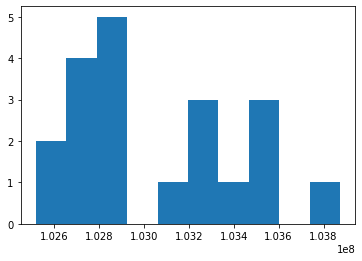

time(): 103.05419869580268 +/- 0.37295802351704666 ms


In [94]:
def do_sleep_100ms():
    sleep(.1)

pass_times = [get_latency(do_pass, 100000) for i in range(0, 200)]
sleep_times = [get_latency(do_sleep_100ms, 10) for i in range(0, 20)]

plt.hist(sleep_times)
plt.show()

print(f'time(): { (np.mean(sleep_times) - np.mean(pass_times)) * 10**-6 } +/- {((np.std(sleep_times)**2 + np.std(pass_times)**2)**.5) * 10 **-6} ms')
